# PyTorch for Computer Vision
* Notebook by Adam Lang
* Date: 3/17/2025

# Overview
* This notebook is based on the concepts taught in Daniel Bourke's PyTorch for Deep Learning Bootcamp on Udemy.

* Although I have been coding in PyTorch since 2022, I continually review and brush up on my torch skills and Daniel Bourke is the best in the business at teaching tips and tricks to make you a PyTorch guru.

* As the great Kobe Bryant once said:
```
Mamba Mentality means "to constantly try to be the best version of yourself. It's a constant quest to try to better today than you were yesterday."
“Why do you think I’m the best player in the world? Because I never ever get bored with the basics.”
```

# 0. Computer Vision Libraries in PyTorch
* `torchvision` - base domain library for computer vision.
  * docs: https://pytorch.org/vision/stable/index.html

* `torchvision.datasets` - get datasets and dataloading functions for computer vision.

* `torchvision.models` - get pretrained computer vision models -- already trained weights/patterns on previous datasets.

* `torchvision.transforms` - functions for manipulating your vision data (images) to be usable for use with an ML model.

* `torch.utils.data.Dataset` - Base dataset class for PyTorch.

* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset.

In [1]:
## import Pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets ## datasets to work with
from torchvision import transforms
from torchvision.transforms import ToTensor ## image augmentation

# Data Sci imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

## check versions
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


# 1. Let's Get a Dataset
* Dataset we will use: `FashionMNIST`
  * This is a variation of the MNIST dataset which was originally a database of hand written digits to recognize postal codes.

* Fashion MNIST
  * A dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
  * Each example is a 28x28 grayscale image, associated with a label from 10 classes.
  * Github: https://github.com/zalandoresearch/fashion-mnist

* However, we are going to get the dataset from torchvision.
  * torchvision docs: https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [2]:
# Setup training data
from torchvision import datasets

## train dataset
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # we want train dataset (False=test data)
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), ## how do we want to transform the data?
    target_transform=None, # how do we want to transform the labels/targets?
)

## test dataset
test_data = datasets.FashionMNIST(
    root="data", ## root folder
    train=False, ## we need test data
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 112MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.55MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 55.7MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.6MB/s]


# 2. Exploratory Data Analysis

In [3]:
## len
len(train_data), len(test_data)

(60000, 10000)

What we see below is the image was transformed from a PIL Image or numpy.ndarray to tensor.

In [4]:
## see first train_data sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

We can see the label above is 9.

In [5]:
## target class names
class_names = train_data.classes
pd.DataFrame(class_names)

,0
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


Summary
* We can see there are 10 classes above.

In [6]:
## class to index
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
## we can see the other attributes
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
## check shape of image
print(f"Image shape: {image.shape} -> [color channels, height, width]\n")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]

Image label: Ankle boot


Summary
* The image only has 1 color channel, why is that?
* Its a black and white image! Gray scale images have 1 color channels.

## Visualizing Dataset
* We explored the data elements but lets visualize it now.
* Our image is a giant tensor.

In [9]:
## shape
image, label = train_data[0]
image.ndim

3

In [10]:
image.shape

torch.Size([1, 28, 28])

Summary
* The tensor is a 1 x 3 tensor, but matplotlib uses numpy which expects an array of 1 dimension so we need to squeeze the tensor.

Image shape: torch.Size([1, 28, 28])


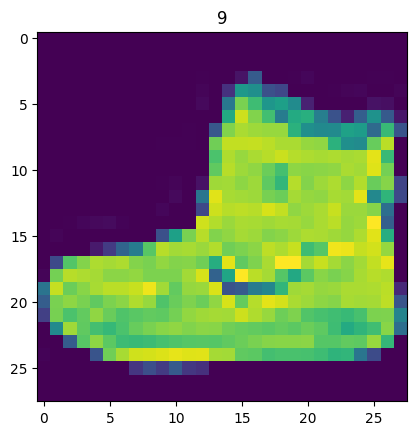

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

## index first train_data image, label
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze());
plt.title(label);

Summary
* We know from the labels a 9 is an ankle boot.

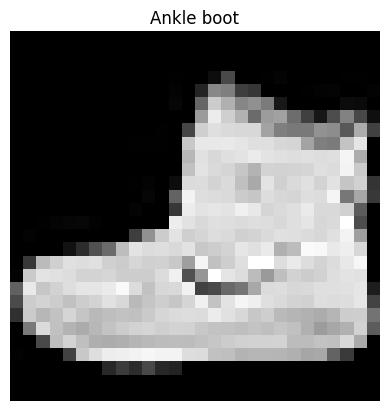

In [12]:
## show image
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

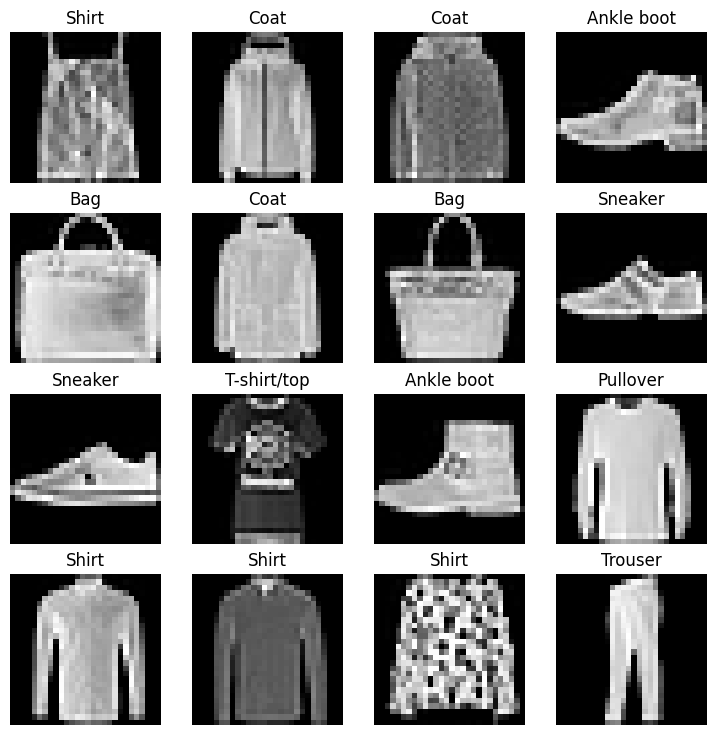

In [13]:
## plot more images
#torch.manual_seed(42) ## set seed for reproducibility

## plot images
fig = plt.figure(figsize=(9,9)) ## 9 x 9 grid
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Summary
* This gives us some insight into some potential issues with building a model.
* Why are there separate classes for T-shirt, shirt, top? Don't they look the same? Could this be confusing for the model to predict/classify things that look very similar? Could we combine some of these classes?
* Just things to think about.....

# 3. Prepare DataLoader
* Right now our data is in the form of PyTorch Datasets.
* Recall that a dataloader turns our dataset into a Python iterable object.
* More specifically, we want to turn out data into BATCHES or MINI-BATCHES.
* Why do we prefer batches?

1. More computationally efficient as in your computing hardware may not be able to ingest 60,000 images in 1 hit.
  * Thus batch size of 32 is more ideal, or 64, or 128, etc...

2. This gives a neural network more chances to update its gradients per epoch.


In [14]:
## this is the PyTorch dataset below
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

This is the `torch.utils.data` parameters:
```
DataLoader(dataset, batch_size=1, shuffle=False, sampler=None,
           batch_sampler=None, num_workers=0, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None, *, prefetch_factor=2,
           persistent_workers=False)
```

In [15]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)


## test dataloader -- generally DO NOT want to shuffle, do not want model to learn order
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b4f10950090>,
 <torch.utils.data.dataloader.DataLoader at 0x7b4f109b1b90>)

We now have iterables

In [16]:
# Lets check out what we've created above
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b4f10950090>, <torch.utils.data.dataloader.DataLoader object at 0x7b4f109b1b90>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [17]:
60000/32

1875.0

Summary
* This means the model will look at 32 batches of size 1875 each, and so on.

In [18]:
# check out whats inside the training dataloader --> get next batch --> turn into iterable
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Summary
* So we have:
1. batch size --> 32
2. color channels --> 1
3. height --> 28
4. width --> 28

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


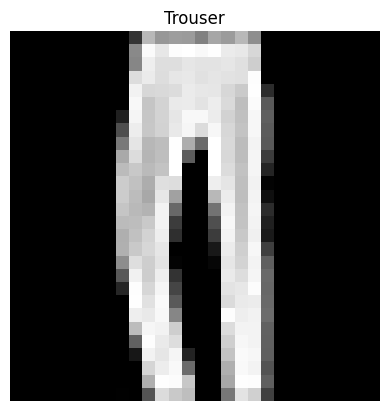

In [19]:
## show a sample
## set seed
torch.manual_seed(42)

## get random indexed image
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

## plot random img and label
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

Summary
* We see a single image with the height and width

# 4. Model 0: Build a baseline model
* When starting to build a series of machine learning modeling experiments its best practice to start with a baseline model.

* A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

* In other words, start simply and add complexity when necessary!

In [20]:
## Create a flatten layer
flatten_model = nn.Flatten()


# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # forward pass

# print what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [21]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118,
        0.0118, 0.0000, 0.0431, 0.7804, 0.7059, 0.7059, 0.7804, 0.0314, 0.0000,
        0.0157, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0196,
        0.0000, 0.0000, 0.0000, 0.7922, 0.9137, 0.8941, 0.8784, 0.9412, 0.7804,
        0.0000, 0.0000, 0.0000, 0.0196, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.3882, 0.8510, 0.8510, 0.8353, 0.8314, 0.8353, 0.8667,
        0.8275, 0.8667, 0.3843, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.4235, 0.8196, 0.9020, 0.8627, 0.8078, 0.8157, 0.6471, 0.8118,
        0.8196, 0.7804, 0.8353, 0.8941, 0.8039, 0.4863, 0.0000, 0.0000, 0.0078,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [22]:
from torch import nn

## build model class
## keep in mind we have 10 classes in our dataset
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()
    ## Sequential 3 layers -- flatten --> Linear --> Linear
    ## Flatten has no learnable params
    self.layer_stack = nn.Sequential(
        nn.Flatten(), ## 1. flatten external dims
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),

        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  # forward method
  def forward(self, x):
    return self.layer_stack(x)

In [23]:
## create instance of model
torch.manual_seed(42)

## setup model with input params
model_0 = FashionMNISTModelV0(
    input_shape=784, ## 28*28 -- output of flatten
    hidden_units=10, # how many units in hidden layer
    output_shape=len(class_names) # 1 for every class
).to("cpu") ## send to cpu to start

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [24]:
## dummy model
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

Summary
* 1 output logit per class (10 classes and 10 logits)

## Setup loss, optimizer and evaluation metrics

* Loss function
  * Since we are working with multiclass data, the loss function is `nn.CrossEntropyLoss()`

* Optimizer
  * `torch.optim.SGD()` (stochastic gradient descent)

* Evaluation Metric
  * Since we are working on a classification problem, let's use `accuracy` as the metric.
  * Options for eval metrics:

    1. Torchmetrics: https://lightning.ai/docs/torchmetrics/stable/classification/accuracy.html

    2. Hugging Face Eval library

    3. Sklearn library

    4. Download/import accuracy metric from Daniel Bourke's helper function github.
      * We will use this as part of Daniel's bootcamp.
      * This is a more modular way to do this as we can reuse functions and classes from other programs.


In [25]:
import requests
from pathlib import Path

## download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  ## 1. get raw github url of .py file
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  ## 2. open file
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [26]:
## import accuracy metric from helper_functions.py
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## Create Function to Time Experiments
* machine learning is very experimental.
* 2 things that we often want to track:

1. Model's performance (e.g. loss, accuracy, precision, recall, etc..)

2. How fast a model runs
  * This includes things such as:
    * Latency
    * Scalability

In [27]:
from timeit import default_timer as timer

## function for timing experiments
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  """
  Prints difference between start and end time of models.
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [28]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.724199996213429e-05

# 5. Create Training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate test loss *per batch* as well.
4. Print out what's happening.
5. Time it all!

In [29]:
## import tqdm for progress bar
from tqdm.auto import tqdm

# Set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set number of epochs (we will keep small for faster training time)
epochs = 3

# Create training and test loop
## -- updating model params every batch
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loopy through the training batches (X=image, y=label)
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train_loss every batch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward -- back propagation
    loss.backward()

    # 5. Optimizer step -- gradient descent
    optimizer.step()

    # Print out whats happenin
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulate)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate accuracy -- argmax to get max index of logits
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate test acc avg per batch
    test_acc /= len(test_dataloader)

  # Print out whats happenin
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5904 | Test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4763 | Test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4550 | Test loss: 0.4766 | Test acc: 83.4265
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
     

In [30]:
str(next(model_0.parameters()).device)

'cpu'

# 6. Make Predictions & Get Model_0 Results
* We can create a function to do this.

In [31]:
## set seed
torch.manual_seed(42)

## function to eval model
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """
  Returns dictionary containing results of model predicting on data_loader.

  """
  ## Set loss, acc to 0
  loss, acc = 0, 0
  ## 1. Put model in `.eval()` mode
  ## 2. Loop through data_loader in batches
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # 3. Make predictions --> Forward Pass
      y_pred = model(X)

      # 4. Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1)) ## max logits/probability

      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn)

## get predictions
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

# 7. Setup device agnostic code for GPU

In [32]:
torch.cuda.is_available()

True

In [33]:
!nvidia-smi

Wed Apr  9 15:12:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
## device agnostic code
import torch ## if not imported above

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 8. Model 1: Building a better model with non-linearity

* We learned about the power of non-linear functions previously.
* Some of these include:
  * ReLU
  * Tanh

In [35]:
## non linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()
    self.layer_stack = nn.Sequential(
        ## step 1 is to always flatten inputs!
        nn.Flatten(), # flatten inputs into single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        ## non-linear layer
        nn.ReLU(),
        ## linear layer
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        ## another non-linear layer
        nn.ReLU()
    )

  ## forward method
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [36]:
## model params
next(model_0.parameters()).device

device(type='cpu')

In [37]:
## check device
device

'cuda'

In [38]:
X.shape

torch.Size([32, 1, 28, 28])

Summary
* We will flatten tensor X above which will create a 28 x 28 tensor which is dimension of 784.

In [39]:
## set manual seed
torch.manual_seed(42)

## lets create instance of model_1
model_1 = FashionMNISTModelV1(input_shape=784, ## this is output of flattened layer after 28x28 image input
        hidden_units=10,
        output_shape=len(class_names)).to(device) ## send to GPU if available!

next(model_1.parameters()).device

device(type='cuda', index=0)

In [40]:
!nvidia-smi

Wed Apr  9 15:12:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             19W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Setup loss function, optimizer, eval metrics

In [41]:
from helper_functions import accuracy_fn

## loss function setup -- measure how wrong our model is
loss_fn = nn.CrossEntropyLoss()

## optimizer -- updates model params to reduce loss
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

# 9. Functionizing Training and Evaluation/Testing Loops
* Lets create a function for:

1. Training Loop - `train_step()`
2. Testing Loop - `test_step()`

In [42]:
## 1. function to train pytorch model
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """
  Performs a training with model trying to learn on data_loader.

  """
  train_loss, train_acc = 0, 0

  ## Put model in training model
  model.train()

  # Add a loop through training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward Pass -- outputs raw logits from model
    y_pred = model(X)

    # 2. Calculate loss and accuracy per batch (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train_loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits to pred labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward -- back propagation
    loss.backward()

    # 5. Optimizer step -- gradient descent
    optimizer.step()



  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [43]:
## 2. Function to test pytorch model
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  """
  Performs a testing loop step on model going over data_loader
  """
  ## setup test_loss, test_acc
  test_loss, test_acc = 0, 0

  # Put model in eval mode
  model.eval()

  ## turn on inference mode context manager (predictions)
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss/acc -- accumulate per batch
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                           y_pred=test_pred.argmax(dim=1)) # go from logits to pred labels

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # print out whats happenin
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [44]:
## set seed
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create optimization and eval loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


  ## time training
  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Train time on cuda: 9.272 seconds
Epoch: 1
--------
Train loss 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Train time on cuda: 18.007 seconds
Epoch: 2
--------
Train loss 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 26.685 seconds


Can we beat model_0?

> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU.
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
  * If you have to copy data to the GPU it takes time and memory!
>
> 2. The hardware you're using has a better CPU in terms of compute capability than the GPU.


For more on how to make your models compute faster:
  * Great article on this subject: https://horace.io/brrr_intro.html

In [45]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

In [46]:
## train time on CPU
total_train_time_model_0

24.067506204999972

# 10 - Get Results Dictionary

In [47]:
## set seed
torch.manual_seed(42)

## function to eval model
def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn=accuracy_fn,
               device=device):
  """
  Returns dictionary containing results of model predicting on data_loader.

  """
  ## Set loss, acc to 0
  loss, acc = 0, 0
  ## 1. Put model in `.eval()` mode
  ## 2. Loop through data_loader in batches
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      ## make our data device agnostic
      X, y = X.to(device), y.to(device)
      # 3. Make predictions --> Forward Pass
      y_pred = model(X)

      # 4. Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1)) ## max logits/probability

      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}



In [48]:
## model_1 results dict
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.0012777427909895778,
 'model_acc': 0.28032041221337156}

In [49]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

# Model 2: Building a Convolutional Neural Network (CNN)
* CNN's are also known as ConvNets.
* CNN's are known for their ability to find patterns in data.
  * While CNN's are mostly used for image data, they can be applied to text, audio, and other data types.

## Breakdown of CNN Architecture
* These slides below are from Mr. Daniel Bourke's keynote.
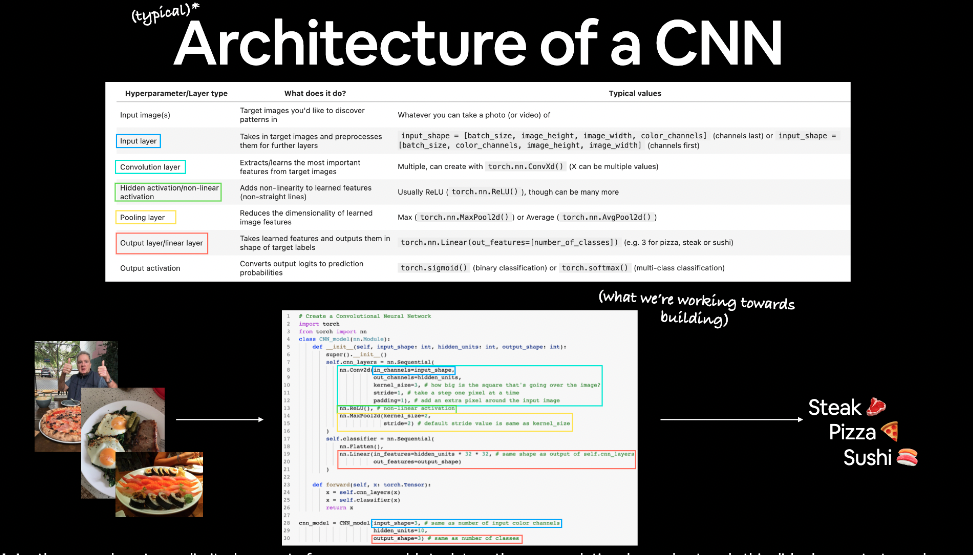

* The more layers you add to your CNN, the more patterns you can expose.

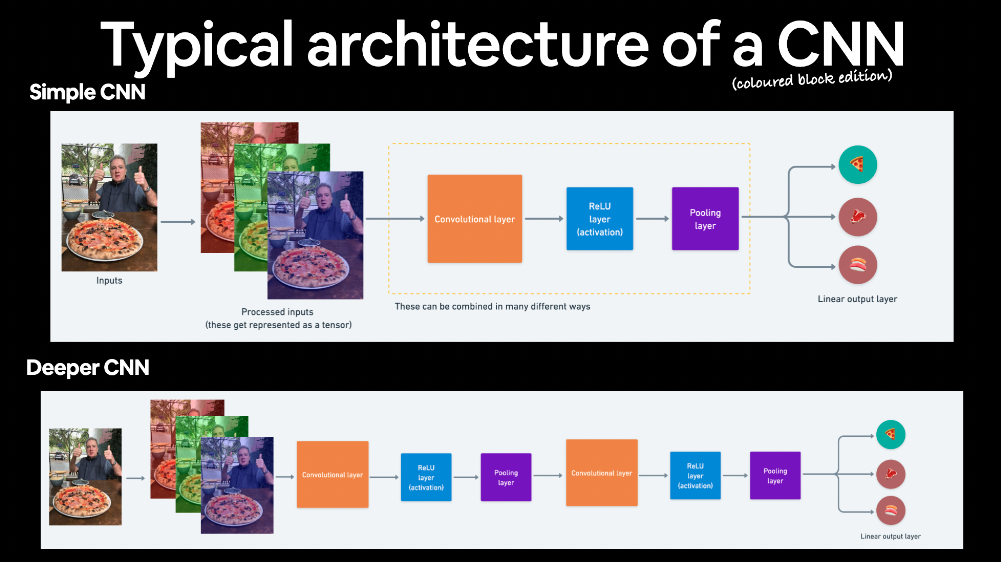

## Resources for CNNs
* [Pinecone tutorial](https://www.pinecone.io/learn/series/image-search/cnn/)
* [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

## TinyVGG CNN Model
* Tiny VGG is a small, lightweight convolutional neural network (CNN) architecture that was developed for **image classification tasks.**
* It has a smaller number of parameters and is simpler to train than the original VGG network, making it a good choice for situations where computational resources are limited.

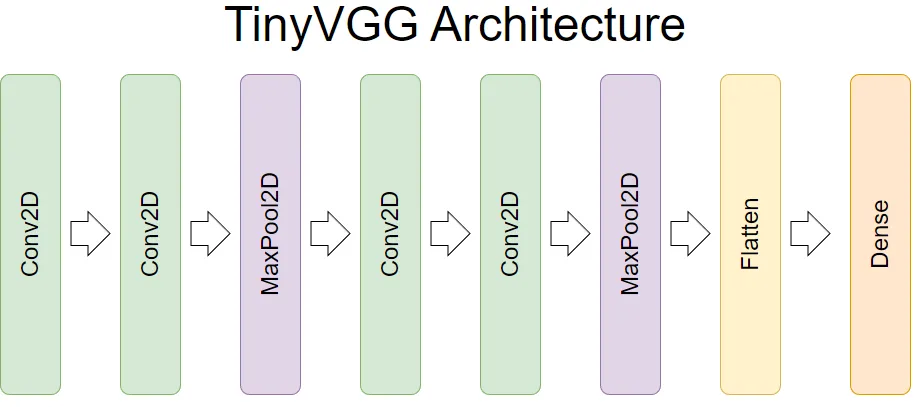

[TinyVGG Source above](https://medium.com/bokchilab/optimizing-the-tinyvgg-model-for-cifar-10-classification-with-mlops-ee8a697eecb5)

### CNN Hyperparameters - Review
* This is a quick review of the hyperparameters of the CNN model, [source](https://medium.com/@abhishekjainindore24/all-about-convolutions-kernels-features-in-cnn-c656616390a1)

#### 1. Kernel or Filter
* A kernel is a small 2D matrix.
* The matrix contents are based upon the mathematical operations performed.
* A kernel maps the input (image) by simple matrix multiplication and addition, * The output obtained is of lower dimensions and therefore easier to work with.
* Kernels are usually always square (MxM) and always move left to right or top to bottom.


#### 2. Stride
* Stride tells the CNN model what steps to move the kernel.
  * A stride of 1 makes the kernel slide by 1 row/column at a time.
  * A stride of 2 moves kernel by 2 rows/columns.
  * ...etc..

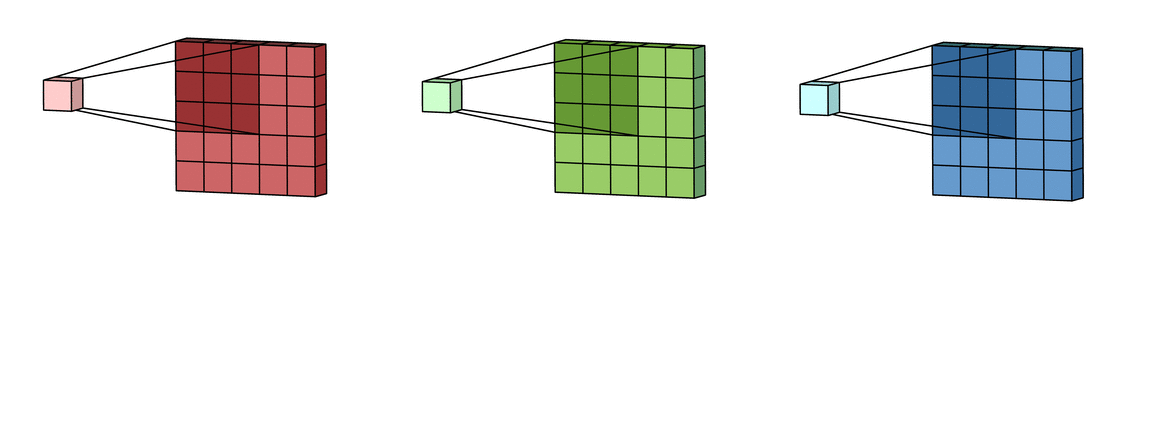

* The concept is that the kernel moves around each matrix convoluting and reducing the matrix based on the mathematical operation(s) to get a smaller matrix with the most important patterns or features extracted from the input object:

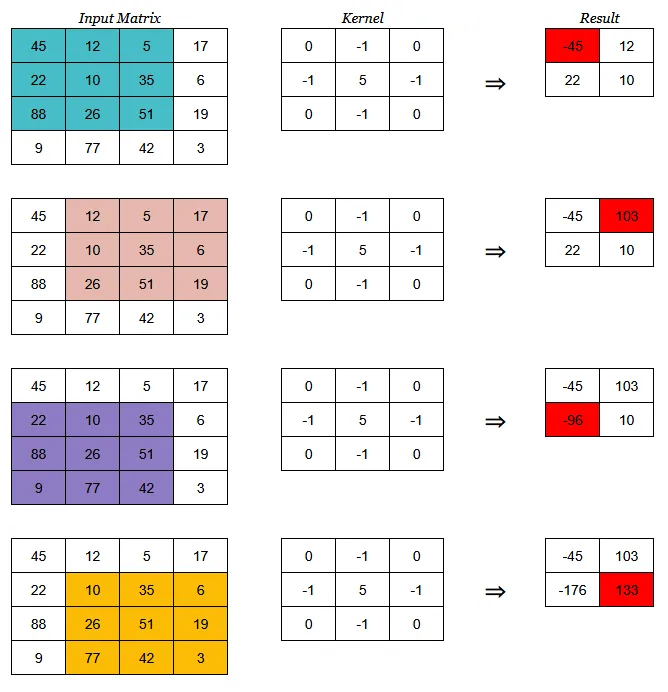

#### 3. Padding
* Padding is used to control the spatial output size and **retain information at the borders of the input**.
* The goal of padding is to prevent shrinkage of the image/input object during convolution, and ensuring corner pixels participate in feature/pattern detection.

* **Preventing Shrinkage***
  * Convolutional operations inherently reduce the spatial dimensions of the input (image).
  * Padding adds extra pixels around the edges, allowing the output to maintain the same spatial dimensions as the input, or at least control the output size.
* **Preserving Border Information**
  * Without padding, the filters would mostly be applied to the central pixels of the image, potentially leading to a loss of information from the edges
  * Padding ensures corner pixels are also processed, allowing the network to learn features from the entire image, including the borders.

* **Types of Padding**

1. Valid Padding
  * No padding is added, resulting in a **smaller output size.**

2. Same Padding
  * The output size is the same as the input size after convolution.
  * This is achieved by adding an appropriate amount of padding to the input.

3. **Zero-padding**
  * A very common type of padding where the added pixels are set to zero.
  * Example of Zero padding in action:

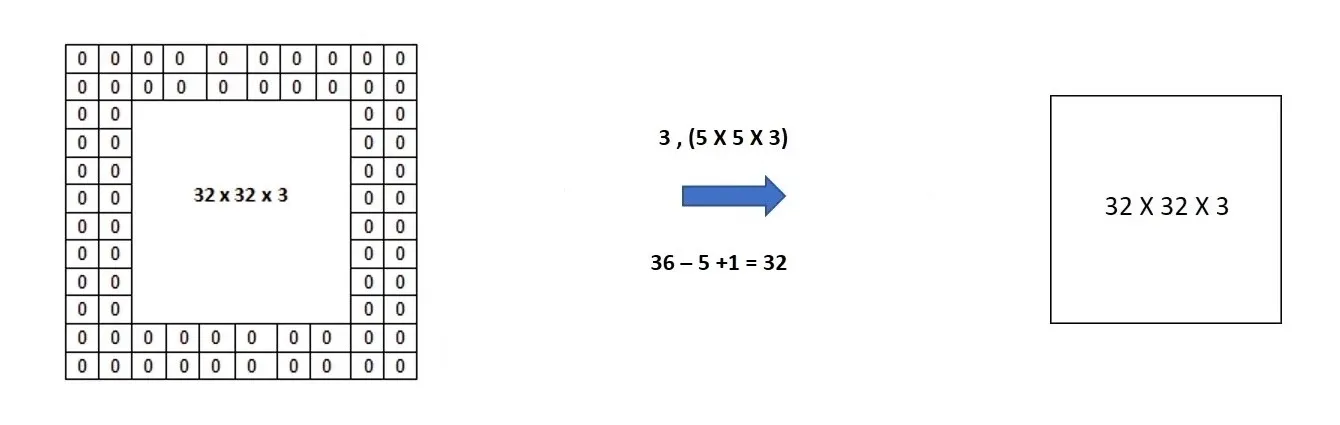

4. Mirror padding
  * Reflects input along its borders to expand the input.

5. Wrap-around padding
  * Works better than mirror padding if your input is spatially periodic.

6. Random padding
  * Randomizes the padding to prevent the model from learning it.

* [Source above](https://shubhamchauhan125.medium.com/a-simple-explanation-to-filters-stride-and-padding-in-cnn-d0236d4a57ef)

In [50]:
# Create a convolutional neural network (CNN)
class FashionMNISTModelV2(nn.Module):
  """
  CNN Model architecture that mimics the `TinyVGG`
  model from CNN explainer website.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    ## Block layer 1
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, ## can be tuple (3,3)
                  stride=1,
                  padding=1), # values we can set ourselves == hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2), # Takes Max value of input
    )
      ## Block layer 2
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    ## Build classifier layer
    self.classifier = nn.Sequential(
        nn.Flatten(), ## flatten to single layer
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this value
                  out_features=output_shape) ## len(classes)

    )

  ## Forward pass
  def forward(self, x: torch.Tensor):
    ## forward propagation
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [51]:
## set seed
torch.manual_seed(42)

## init model
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)



## Stepping through details of `nn.Conv2d()`
* Docs: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [52]:
## set manual seed
torch.manual_seed(42)

# Create batch of random image data
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [53]:
test_image.shape

torch.Size([3, 64, 64])

In [54]:
torch.manual_seed(42)
## create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3), # or (3,3) tuple
                       stride=1,
                       padding=0)

# Pass data through convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [55]:
# ## add extra dim to test image --> unsqueeze it
# test_image.unsqueeze(0).shape

## Stepping through `nn.MaxPool2d()`
* This is important in all machine learning projects to understand the inputs and outputs of various components of your model(s).
* PyTorch docs: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [56]:
## test image from above --> using random tensors
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [57]:
## print out original image shape without unsqueezed dimensions
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueesed dimension: {test_image.unsqueeze(0).shape}")

# create sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through only conv_layer first
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")


# pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueesed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): tensor([[[[ 1.5396,  0.6656,  0.9692,  ...,  0.1780,  0.8983,  0.8711],
          [ 1.2664,  0.3727,  0.6442,  ...,  0.2139,  0.1580,  1.2191],
          [ 0.1515,  0.4818,  0.5464,  ...,  0.5009,  0.1515,  0.5597],
          ...,
          [ 1.6308,  0.6400,  0.4094,  ...,  0.1841,  1.0679,  1.0237],
          [ 0.8581,  0.6099,  0.2680,  ...,  0.5070,  0.4208,  1.0124],
          [ 0.2981,  1.5012,  0.5511,  ...,  0.2775,  0.2842,  0.4228]],

         [[ 0.2753,  0.9192,  1.0833,  ...,  0.7329, -0.2211,  1.5599],
          [ 0.4162,  0.1925, -0.1572,  ...,  0.7912,  0.4754,  0.1728],
          [ 0.0699,  0.2825,  0.0294,  ...,  0.4263,  0.6739,  0.9376],
          ...,
          [ 1.0879,  0.2949,  0.1847,  ..., -0.1382,  1.1582,  0.4421],
   

In [58]:
torch.manual_seed(42)
# create random tensor with similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# create max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass random tensor through max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Summary
* Convolutional layer compresses the input information.
* The max pool layer further compresses this information.

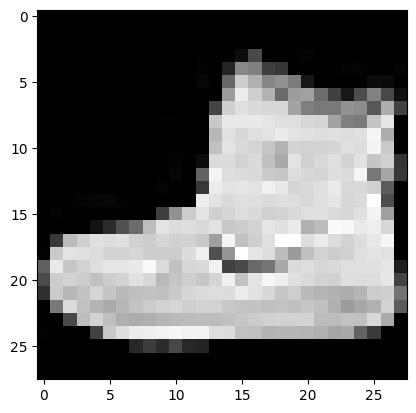

In [59]:
## plot current image
plt.imshow(image.squeeze(), cmap="gray");

In [60]:
## create random image tensor
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [61]:
10*7*7

490

In [62]:
## Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

Summary
* We now have 1 number for each class in our dataset --> 10.

## Setup loss function and optimizer for Model 2

In [63]:
# setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

## loss function -- multi class classification problem
loss_fn = nn.CrossEntropyLoss()

## optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

# Training and testing `model_2` using our training and test functions

In [64]:
## using previous train_step() func
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure train time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ## train loop
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  ## test loop
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)


## get time of training
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss 0.59769 | Train acc: 78.39%
Test loss: 0.38800 | Test acc: 86.30%

Epoch: 1
------
Train loss 0.35823 | Train acc: 87.12%
Test loss: 0.35634 | Test acc: 86.99%

Epoch: 2
------
Train loss 0.32082 | Train acc: 88.45%
Test loss: 0.31836 | Test acc: 88.34%

Train time on cuda: 33.082 seconds


Lets see what GPU we used

In [65]:
!nvidia-smi

Wed Apr  9 15:13:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P0             28W /   70W |     166MiB /  15360MiB |     10%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [66]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device,
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0005061393021605909,
 'model_acc': 0.32025743262429335}

In [67]:
## what was model_0 results?
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.0010611428879201412,
 'model_acc': 0.30028917735831345}

Summary
* It appears we barely beat the model_0 accuracy.

# Compare model results and training time across experiments


In [68]:
import pandas as pd

## setup dataframe to compare results
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.001061,0.300289
1,FashionMNISTModelV1,0.001278,0.280320
2,FashionMNISTModelV2,0.000506,0.320257


Summary
* model_0 had linear layers ONLY.
* model_1 had ReLU layers which were non-linear.
* model_2 used a CNN model instead.
* Overall, we can see that model_0 and model_2 were more accurate but not by much.

In [69]:
# Add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.001061,0.300289,24.067506
1,FashionMNISTModelV1,0.001278,0.280320,26.684558
2,FashionMNISTModelV2,0.000506,0.320257,33.082394


Summary
* These values are really dependent upon hardware.
* Interestingly enough, model_0 was trained on the CPU but it was only linear layers.

## Visualize model results

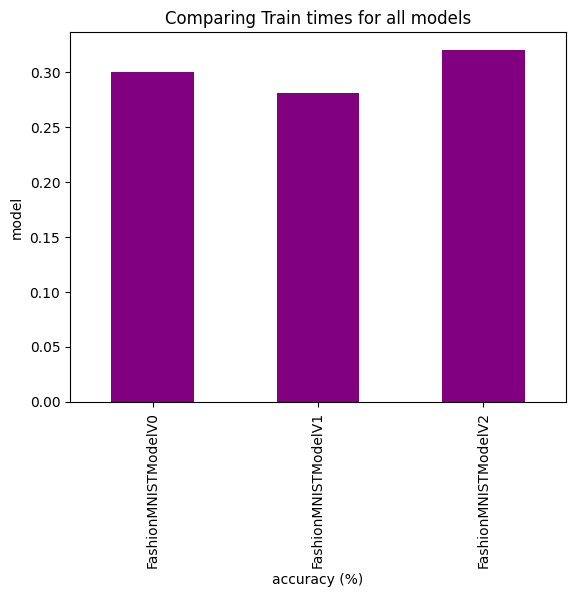

In [70]:
## visualize results
compare_results.set_index("model_name")["model_acc"].plot(kind="bar", color='purple')
plt.xlabel("accuracy (%)")
plt.ylabel("model")
plt.title("Comparing Train times for all models")
plt.show();

# Make and Evaluate random predictions with best model

In [71]:
## function to make preds
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  ## list to store prediction probs
  pred_probs = []
  ## put model in eval mode
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample -- add batch dimension and pass to target device
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass -- model outputs raw logits
      pred_logit = model(sample)

      # get prediction probs (raw logits --> pred probs)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  ## torch.stack --> concat list to single tensor
  return torch.stack(pred_probs)

In [72]:
## view test_data
type(test_data)

torchvision.datasets.mnist.FashionMNIST

In [73]:
import random
#random.seed(42)
## list of test samples
test_samples = []
test_labels = []

## loop through the test_data (this is not the test_dataloader)
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

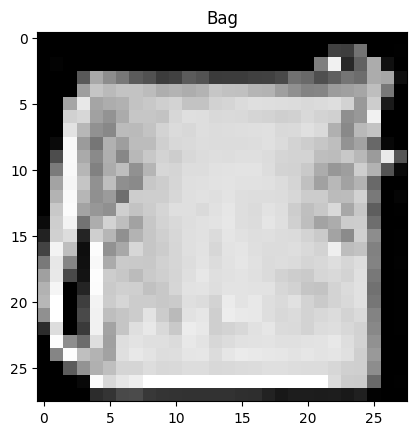

In [74]:
## plot
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]]);

In [75]:
## make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# view first 2 prediction probs
pred_probs[:2]

tensor([[8.4004e-03, 5.1376e-05, 1.2256e-03, 3.1844e-05, 3.0488e-04, 3.2576e-04,
         9.9394e-03, 2.3221e-05, 9.7852e-01, 1.1798e-03],
        [5.3947e-01, 4.7026e-04, 6.0261e-03, 3.2927e-02, 2.0864e-03, 3.6161e-06,
         4.1881e-01, 4.6457e-05, 1.2638e-04, 3.1628e-05]])

In [76]:
test_labels

[8, 6, 1, 9, 7, 4, 5, 1, 0]

In [77]:
# Convert prediction probabilities to labels
## we need the argmax for each label
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 0, 1, 9, 7, 4, 5, 1, 8])

In [78]:
test_labels

[8, 6, 1, 9, 7, 4, 5, 1, 0]

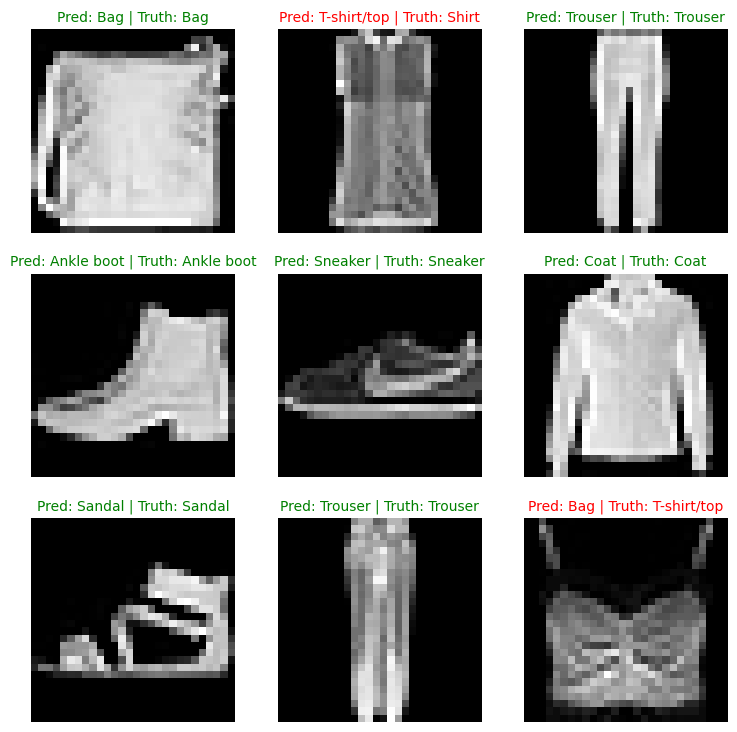

In [79]:
## Plot predictions --> 9 x 9 for 9 random samples
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i+1) ## index is i+1 becuase we can't start at zero

  # plot target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # find prediction label in text form (e.g. "Sandals")
  pred_label = class_names[pred_classes[i]]

  # Get truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # create title for plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if pred same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  ## turn off axis
  plt.axis(False)

Summary
* We can see the model appears to be confused on the first row first picture it predicted dress but it is actually a coat.
* This is something we can work on later with data augmentation to teach the ML model to see various aspects of the image.

## Making a Confusion Matrix for further prediction evaluation

* A confusion matrix is one of the standard methods to evaluate classification model results visually.
* To plot confusion matrix we need to:

1. Make predictions with trained model on test dataset.
2. Make confusion matrix `torchmetrics.
  * docs: https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`
  * Created by Sebastian Raschka: https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

Make predictions on entire dataset

In [80]:
## import tqdm.auto
from tqdm.auto import tqdm

## 1. Make predictions with trained model
y_preds = []
model_2.eval() ## model in eval model
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_logit = model_2(X)
    # Turn preds from logits --> pred probs --> pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # put preds on CPU for evaluation --> matplotlib needs cpu
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [81]:
len(y_pred_tensor)

10000

Summary
* We now have 10,000 predictions.

In [82]:
## see if required packages are installed, if not install them
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  ## assert index higher than 19
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.5 MB/s eta 0:00:00
mlxtend version: 0.23.4


Note: May have to restart runtime after installing above!

In [83]:
import mlxtend
mlxtend.__version__

'0.23.4'

In [84]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [85]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

Summary
* We want to compare the test_data targets to the y_pred tensor predictions

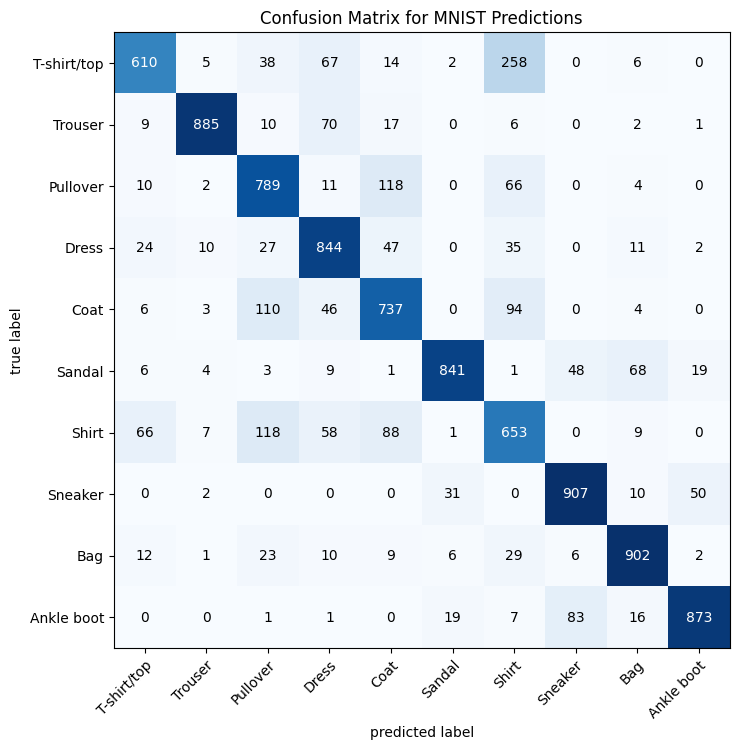

In [86]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), # classes
                          task='multiclass') # classification task
confmat_tensor = confmat(preds=y_pred_tensor,
                           target=test_data.targets)



# 3. plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(12,8),
)
plt.title('Confusion Matrix for MNIST Predictions');


Summary
* The confusion matrix allows us to visualize our errors.
* For example, we can see:
  * Model predicts T-shirt/top when true label is Shirt.
  * Model predicts Pullover when true label is Shirt.
  * Model predicts Shirt when true label is Coat.
  * ..etc..

# Save and Load Best Performing Model
* This will save the model locally.

In [88]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

## create model save path
MODEL_NAME = "pytorch_comp_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


## save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_comp_vision_model_2.pth


In [89]:
test_image.shape ## checking shape

torch.Size([3, 64, 64])

In [90]:
## create new instance of model_2
torch.manual_seed(42) ## set seed

## init model
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))


## load in saved state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [91]:
## lets review model_2 results to see if the loaded model is the same or similar?
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0005061393021605909,
 'model_acc': 0.32025743262429335}

In [92]:
# Evaluate loaded model
torch.manual_seed(42) ## set seed

## evaluate results of loaded model 2
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,

)
## view results
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.0005061393021605909,
 'model_acc': 0.32025743262429335}

Summary
* It appears we have the same numbers between the saved model and the model 2 we trained.

In [94]:
## check if model results close to one another
## using `torch.isclose` function
torch.isclose(torch.tensor(model_2_results["model_loss"]),
                           torch.tensor(loaded_model_2_results["model_loss"]),
                          atol=1e-02) ## adjust tolerance results

tensor(True)

Summary
* It appears they are the same!